# 4.10 - Coding Etiquette & Excel Reporting

## Part 1: Setup and Libraries

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Part 2: Data Import

In [12]:
#Importing path, and csv files of products

path= r'C:\Users\Yoany\Documents\Instacart Basket Analysis'

# To import 4.9 customer_ords_prods part A.pkl

customer_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))
customer_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


## Part 3: Discussing Data Security Implications

### Security implications that may arise is the PII data that can be link to a specific person. As this data highlights a first/last name, age, state of residence, family status and income, these can be sensitive information to possibly be used and draw a connection to somebody. Actions steps to be taken will include: 

### 1: inform the senior collegue for data secutry concerns, 
### 2: comply with EU data privacy regulations that govern the storage, usage and sharing of data

## Part 4: Regional Sales

In [17]:
#Through the wikipedia article, in order to create the correct regions, the states will be categorized based on a Northeast, Midwest, South, and West region. These 4 regions will include the states consistent with the article

# Step 1: regional mapping
# 'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
# 'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
# 'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
# 'West': ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#step 2: creating the if statements within the new empty list of region_map
region_map = []

for value in customer_ords_prods['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_map.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region_map.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_map.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region_map.append('West')
    else:
        region_map.append('Not enough data')

region_map

['Midwest',
 'Midwest',
 'Northeast',
 'Midwest',
 'Midwest',
 'West',
 'South',
 'South',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'West',
 'South',
 'South',
 'Northeast',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'South',
 'South',
 'Midwest',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'Northeast',
 'South',
 'West',
 'Midwest',
 'South',
 'South',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'Midwest',
 'West',
 'Northeast',
 'South',
 'South',
 'South',
 'South',

In [19]:
# step 2: setting region_map to new column region
customer_ords_prods['Region']=region_map

In [21]:
#Performing value counts to make sure script was correctly performed 
customer_ords_prods['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [23]:
#Comparing it to total counts of the dataset
customer_ords_prods.shape
#32429085 rows are equal to the the total count when adding up the values of all 4 regions. There are no Nan values so we can conclude it was done correctly 

(32404859, 35)

In [31]:
customer_ords_prods.rename(columns={'Region': 'region'}, inplace=True)

In [35]:
#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
#Using crosstab to identify spending patterns

crosstab = pd.crosstab(customer_ords_prods['region'], customer_ords_prods['spending_flag'], dropna = False)
crosstab.to_clipboard()

| Region    | High spender | Low spender |
|-----------|--------------|-------------|
| Midwest   | 155,975      | 7,441,350   |
| Northeast | 108,225      | 5,614,511   |
| South     | 209,691      | 10,582,194  |
| West      | 160,354      | 8,132,559   |

*The data shows vastly more low spenders than high spenders across all regions, suggesting most customers make small purchases. The South leads in both categories, indicating strong market activity, while the Northeast lags in high spenders. Regional strategies may be needed to boost revenue, especially in underperforming areas.*

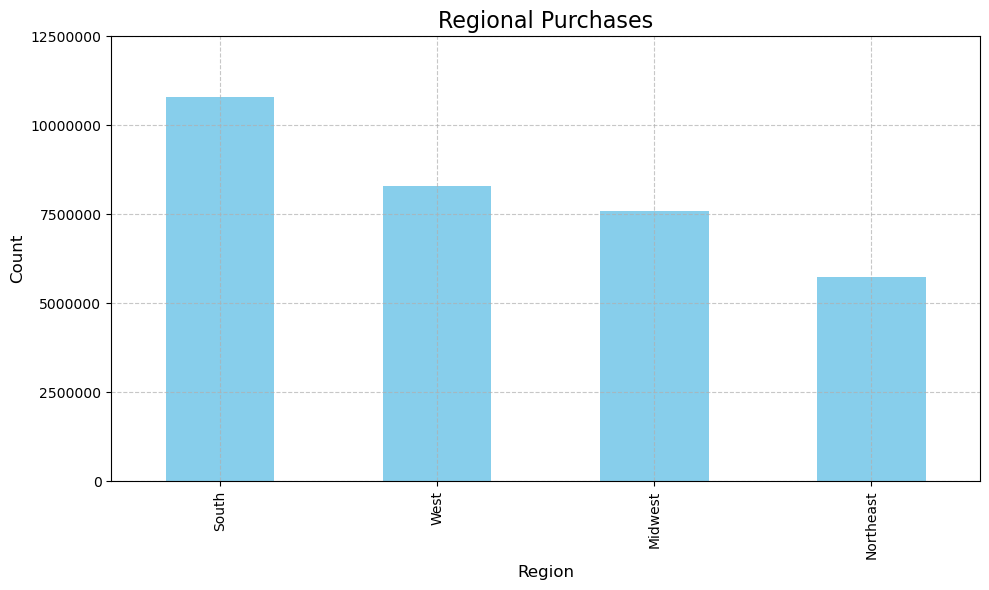

In [39]:
# Plotting the crosstab data
bar_regional_counts = customer_ords_prods['region'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Customizations
plt.title('Regional Purchases', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,15000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

bar_regional_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '1 4.10 bar_regional_counts.png'))

## Part 5: High vs. Low Activity Customers Dataframe

In [46]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer=[]

for value in customer_ords_prods['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
customer_ords_prods['activity_customer_level']=activity_customer

In [48]:
#Checking to see if it was done correctly
customer_ords_prods['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30964564
Low-activity Customer      1440295
Name: count, dtype: int64

In [50]:
# Subsetting a new df based on a high-activity customer
high_activity_cust_ords_prods = customer_ords_prods[customer_ords_prods['activity_customer_level']=='High-activity Customer']
high_activity_cust_ords_prods.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,region,activity_customer_level
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Glass,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,High-activity Customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,High-activity Customer
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,High-activity Customer


In [52]:
#Checking values if correct
high_activity_cust_ords_prods['activity_customer_level'].value_counts(dropna = False)
#Since High-activity customers make up 100% of the new dataframe, the exclusion flag was correctly subsetted

activity_customer_level
High-activity Customer    30964564
Name: count, dtype: int64

In [54]:
#Exporting data
high_activity_cust_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 high_activity_cust_ords_prods.pkl'))

## Part 6: Creating New Exclusion Flag Based on Age, Income, and Number of Dependants 

In [57]:
#Customer profiling based on age based off of quartiles found through the describe function
customer_ords_prods[['age','income','n_dependants']].describe()

#young_adult<33
#adult >=33 & <49
#older_adult >=49 &<65
#senior >=65

,age,income,n_dependants
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,1.501896e+00
std,1.848558e+01,4.305727e+04,1.118865e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.700400e+04,1.000000e+00
50%,4.900000e+01,9.661800e+04,2.000000e+00
75%,6.500000e+01,1.279120e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [59]:
age_groups=[]

for value in customer_ords_prods['age']:
    if value <33:
        age_groups.append('Young adult')
    elif value >=33 and value <49:
        age_groups.append('Adult')
    elif  value >=49 and value < 65:
        age_groups.append('Older adult')
    elif value >=65:
        age_groups.append('Senior')
    else: age_groups.append('Not enough information')
customer_ords_prods['age_group']=age_groups

In [61]:
#Checking if is done correctly. And all values add up to 32,429,085
customer_ords_prods['age_group'].value_counts(dropna= False)

age_group
Senior         8575084
Adult          8116256
Older adult    8087706
Young adult    7625813
Name: count, dtype: int64

In [63]:
#Customer profiling based on income and the quartiles of income brackets
customer_ords_prods['income'].describe()

#Low Income Customer: <96608
#Middle Income Customer >=96608 & < 127876
#High Income Customer >=127876

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [65]:
#Customer profile for income flag
income_bracket=[]

for value in customer_ords_prods['income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
customer_ords_prods['income_bracket']=income_bracket

In [67]:
#Checking is done correctly. And all values add up to 32,429,085
customer_ords_prods['income_bracket'].value_counts(dropna= False)

income_bracket
Low Income Customer       16198904
High Income Customer       8105026
Middle Income Customer     8100929
Name: count, dtype: int64

In [71]:
#Customer profiling based on number of dependents
customer_ords_prods['n_dependants'].describe()

#Single= <1
#Parent= >=1

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [73]:
dependents=[]

for value in customer_ords_prods['n_dependants']:
    if value <1:
       dependents.append('Single')
    elif value >=1:
        dependents.append('Parent')
    
    else: dependents.append('Not enough information')
customer_ords_prods['parent_status']=dependents

In [75]:
#Checking is done correctly. And all values add up to 32,429,085
customer_ords_prods['parent_status'].value_counts(dropna= False)

parent_status
Parent    24307356
Single     8097503
Name: count, dtype: int64

## Part 7: Busiest Day of The Week

In [78]:
#Adding new column for day of week for better readability

day_of_week = []
for value in customer_ords_prods['orders_day_of_week']:
    if value == 0:
        day_of_week.append('Saturday')
    elif value == 1:
        day_of_week.append('Sunday')
    elif value == 2:
        day_of_week.append('Monday')
    elif value == 3:
        day_of_week.append('Tuesday')
    elif value == 4:
        day_of_week.append('Wednesday')
    elif value == 5:
        day_of_week.append('Thursday')
    elif value == 6:
        day_of_week.append('Friday')

customer_ords_prods['day_of_week'] = day_of_week
customer_ords_prods['day_of_week'].value_counts(dropna= False)

day_of_week
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

In [80]:
crosstab_age_vs_dow = pd.crosstab(customer_ords_prods['day_of_week'], customer_ords_prods['age_group'], dropna = False)
crosstab_age_vs_dow

age_group,Adult,Older adult,Senior,Young adult
day_of_week,,,,
Friday,1122808,1123962,1199815,1049905
Monday,1055000,1058003,1114364,986463
Saturday,1558281,1537663,1643234,1465004
Sunday,1412179,1417239,1483125,1347687
Thursday,1053804,1050529,1113361,988097
Tuesday,962397,957689,1022963,897485
Wednesday,951787,942621,998222,891172


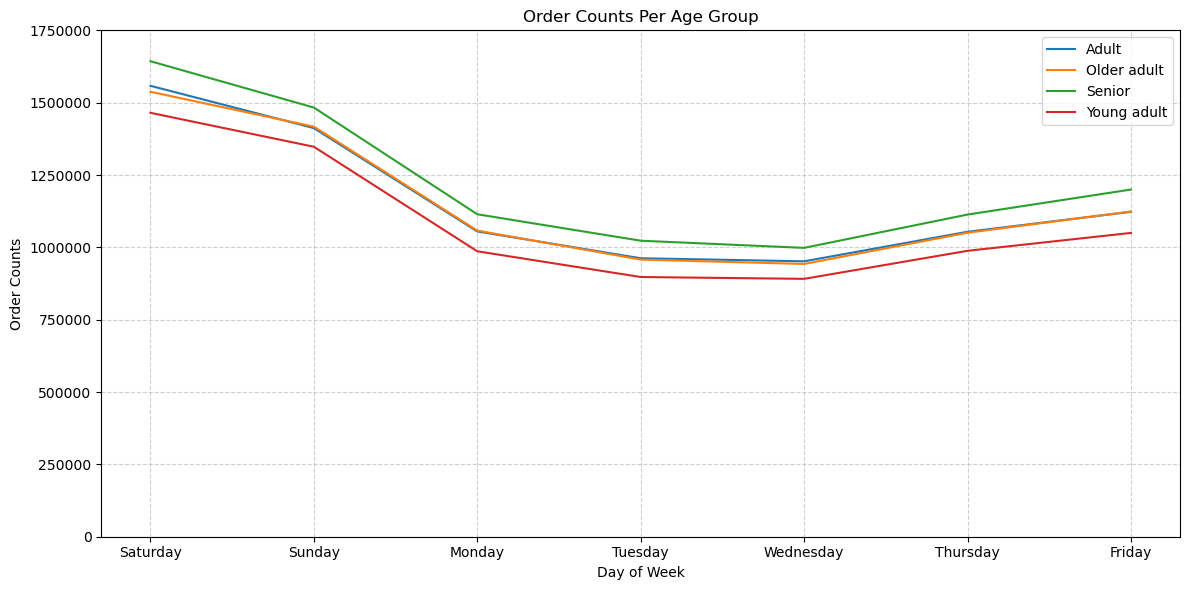

In [82]:
#Reordering the columns into chronological order
desired_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Reorder the DataFrame's index to the desired order
crosstab_age_vs_dow = crosstab_age_vs_dow.reindex(desired_order)

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for age_group in crosstab_age_vs_dow.columns:
    plt.plot(crosstab_age_vs_dow.index, crosstab_age_vs_dow[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.yticks(np.arange(0,2000000,250000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,2000000,250000)])
plt.xticks(range(0, 7))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2 4.10 line_age_group_vs_dow.png'))
plt.show() 

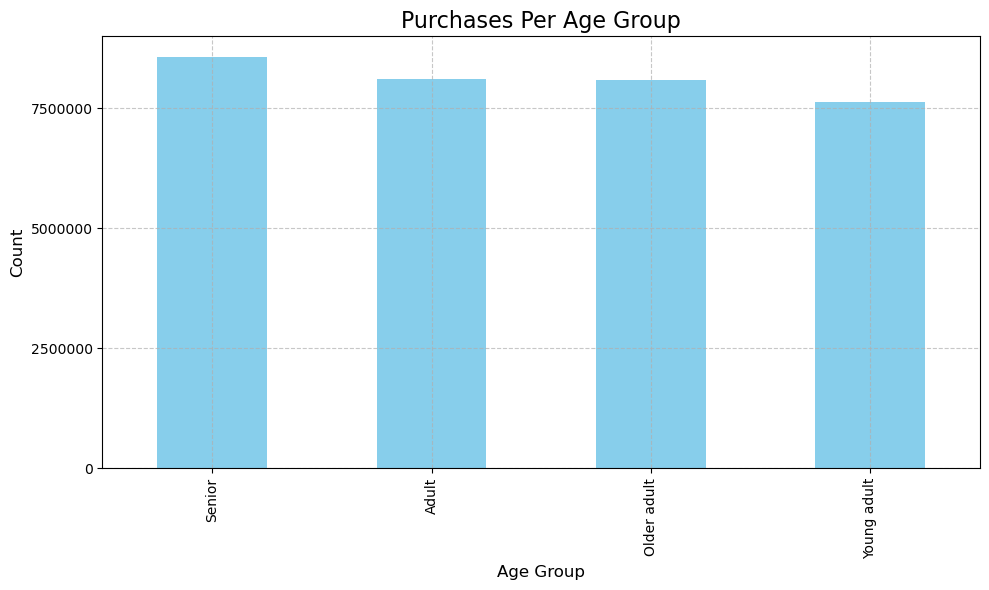

In [84]:
bar_age_group_counts= customer_ords_prods['age_group'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Customizations
plt.title('Purchases Per Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,10000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
bar_age_group_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '3 4.10 bar_age_group_counts.png'))

## Part 8: Busiest Hour of the Day

In [89]:
crosstab_age_vs_time = pd.crosstab(customer_ords_prods['order_hour_of_day'], customer_ords_prods['age_group'], dropna = False)
crosstab_age_vs_time

age_group,Adult,Older adult,Senior,Young adult
order_hour_of_day,,,,
0,55522,53926,56612,52709
1,29263,28434,30136,27867
2,17682,16157,18310,17226
3,12790,12055,13967,12469
4,12590,13515,14327,12810
5,21110,21932,24049,20870
6,71761,70236,77589,70907
7,216690,225024,240259,209081
8,429116,430629,456844,401529


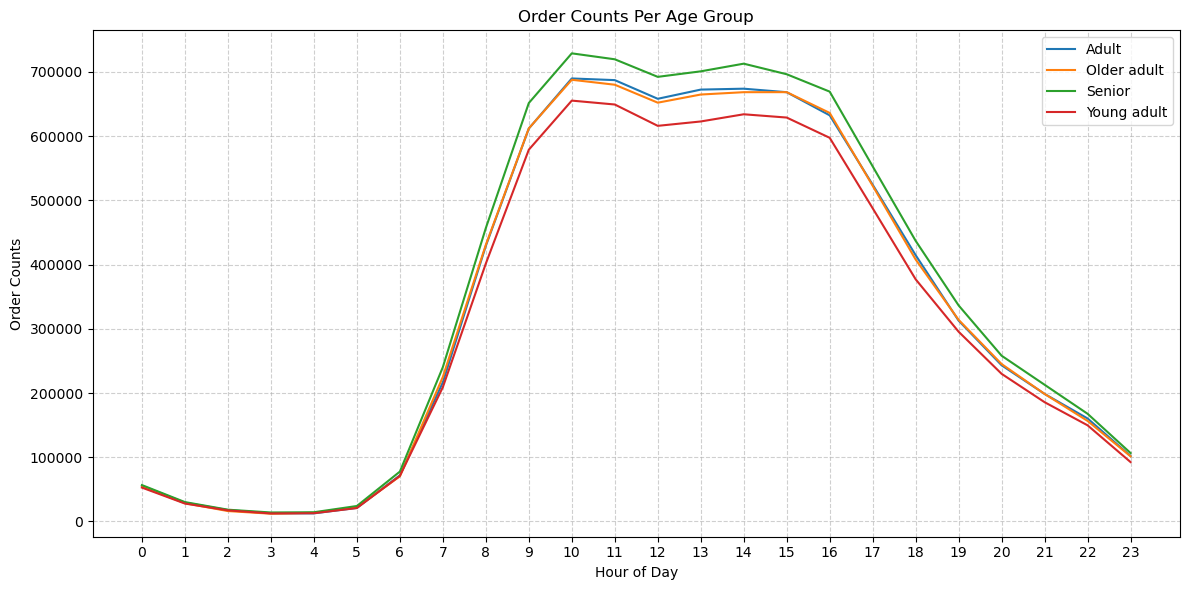

In [91]:
# Create the line chart
plt.figure(figsize=(12, 6)) 

for age_group in crosstab_age_vs_time.columns:
    plt.plot(crosstab_age_vs_time.index, crosstab_age_vs_time[age_group], label=age_group)

# Add title and labels
plt.title('Order Counts Per Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Order Counts')

# Add legend
plt.legend()

# Display the plot
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 4.10 line_age_group_vs_time.png'))
plt.show() 

*This dataset groups hourly purchase data by age group. Across all purchases, each age group appears to follow a similar daily shopping trend, with a peak around 10 AM. Among all age groups, seniors account for the highest purchase volume.*

*It seems the all age groups also follow similar purchase trends as it peaks on a Saturday, then dips into the week. After tuesday, it continues to trend back up again.*

## Part 9: Sales Of Various Low, Mid and High Ranged Products

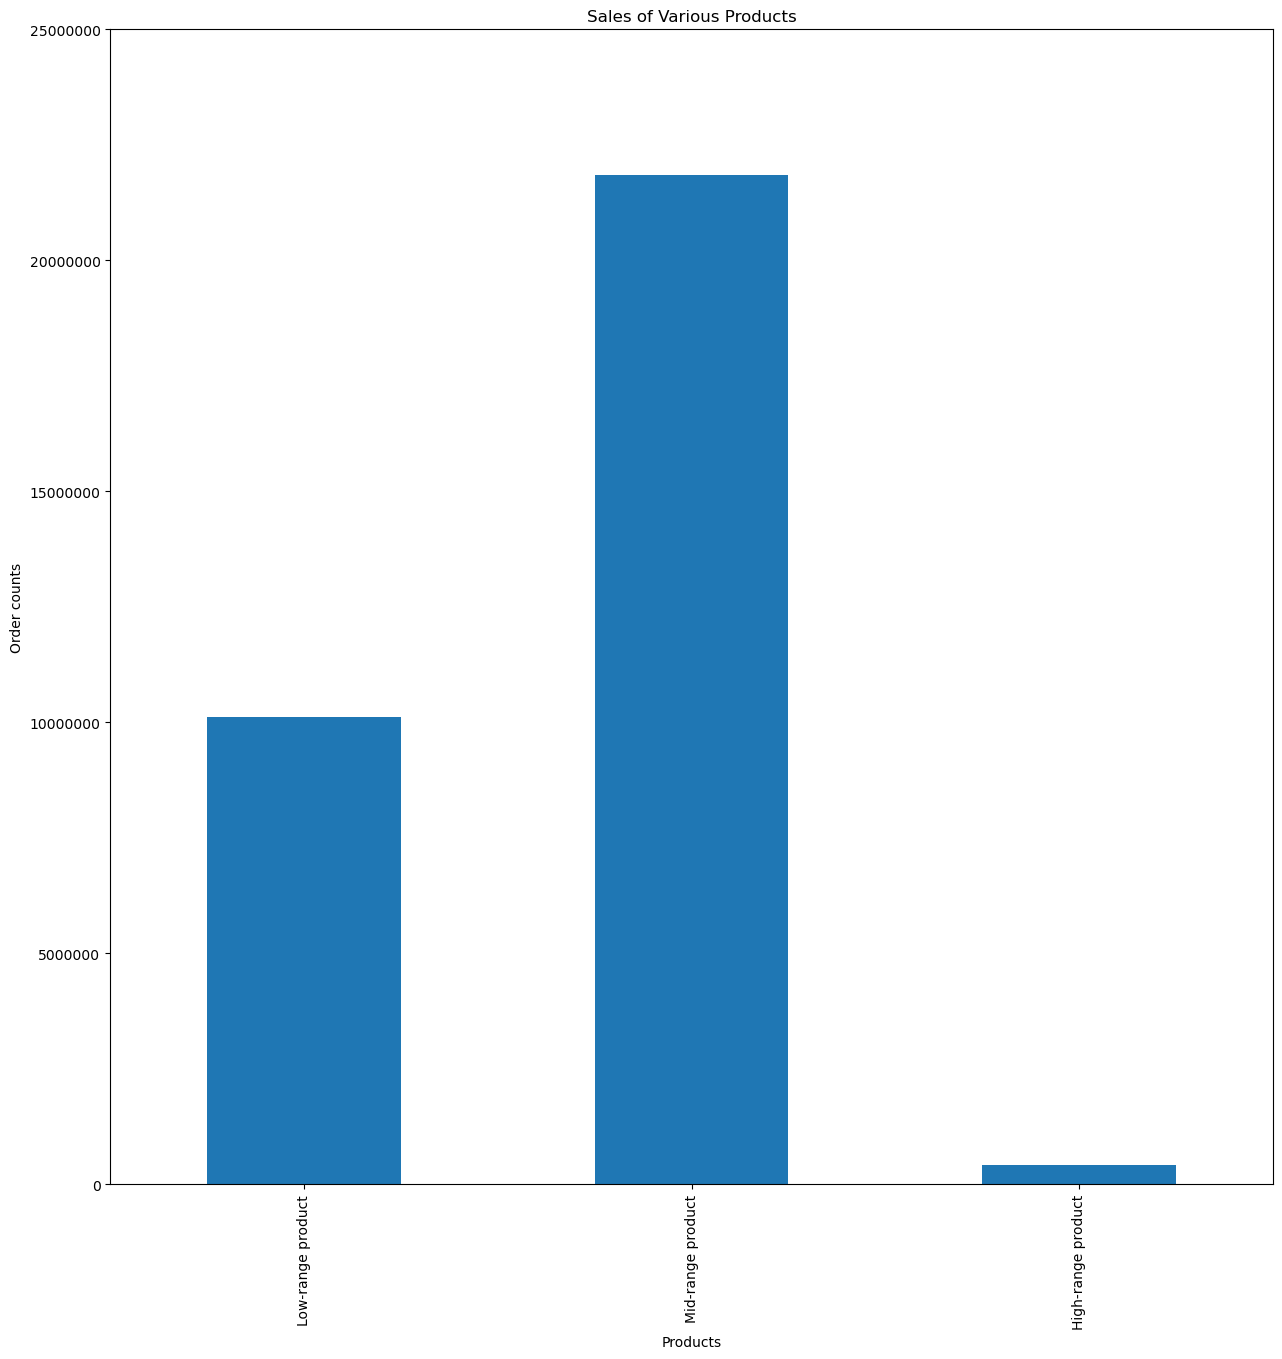

In [96]:
#From exercise 4.7, new variables of range groups of price tags were generated 

#High_range product: >$15
#Mid-Range Product: >$5 & <=$15
#Low-Range Product: <$5

# Reorder the categories
ordered_categories = ['Low-range product', 'Mid-range product', 'High-range product']

# Use Categorical data type to enforce the order
customer_ords_prods['price_range_loc'] = pd.Categorical(customer_ords_prods['price_range_loc'], categories=ordered_categories, ordered=True)

plt.figure(figsize=(15, 15))

# Plot the bar chart with the ordered categories
customer_ords_prods['price_range_loc'].value_counts().sort_index().plot.bar()

# Add title and labels
plt.title('Sales of Various Products')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,30000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,30000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 4.10 bar_sales_product_ranges.png'))
plt.show()

*In this graph, we can see the mid-ranged products have the highest sales. Or in other words, products that are priced between 5 and 15 dollars*

## Part 10: Sales Between Different Departments

In [103]:
#Adding new column with names of the department for better readability

department_name = []

for value in customer_ords_prods['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10:
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


customer_ords_prods['department_name'] = department_name

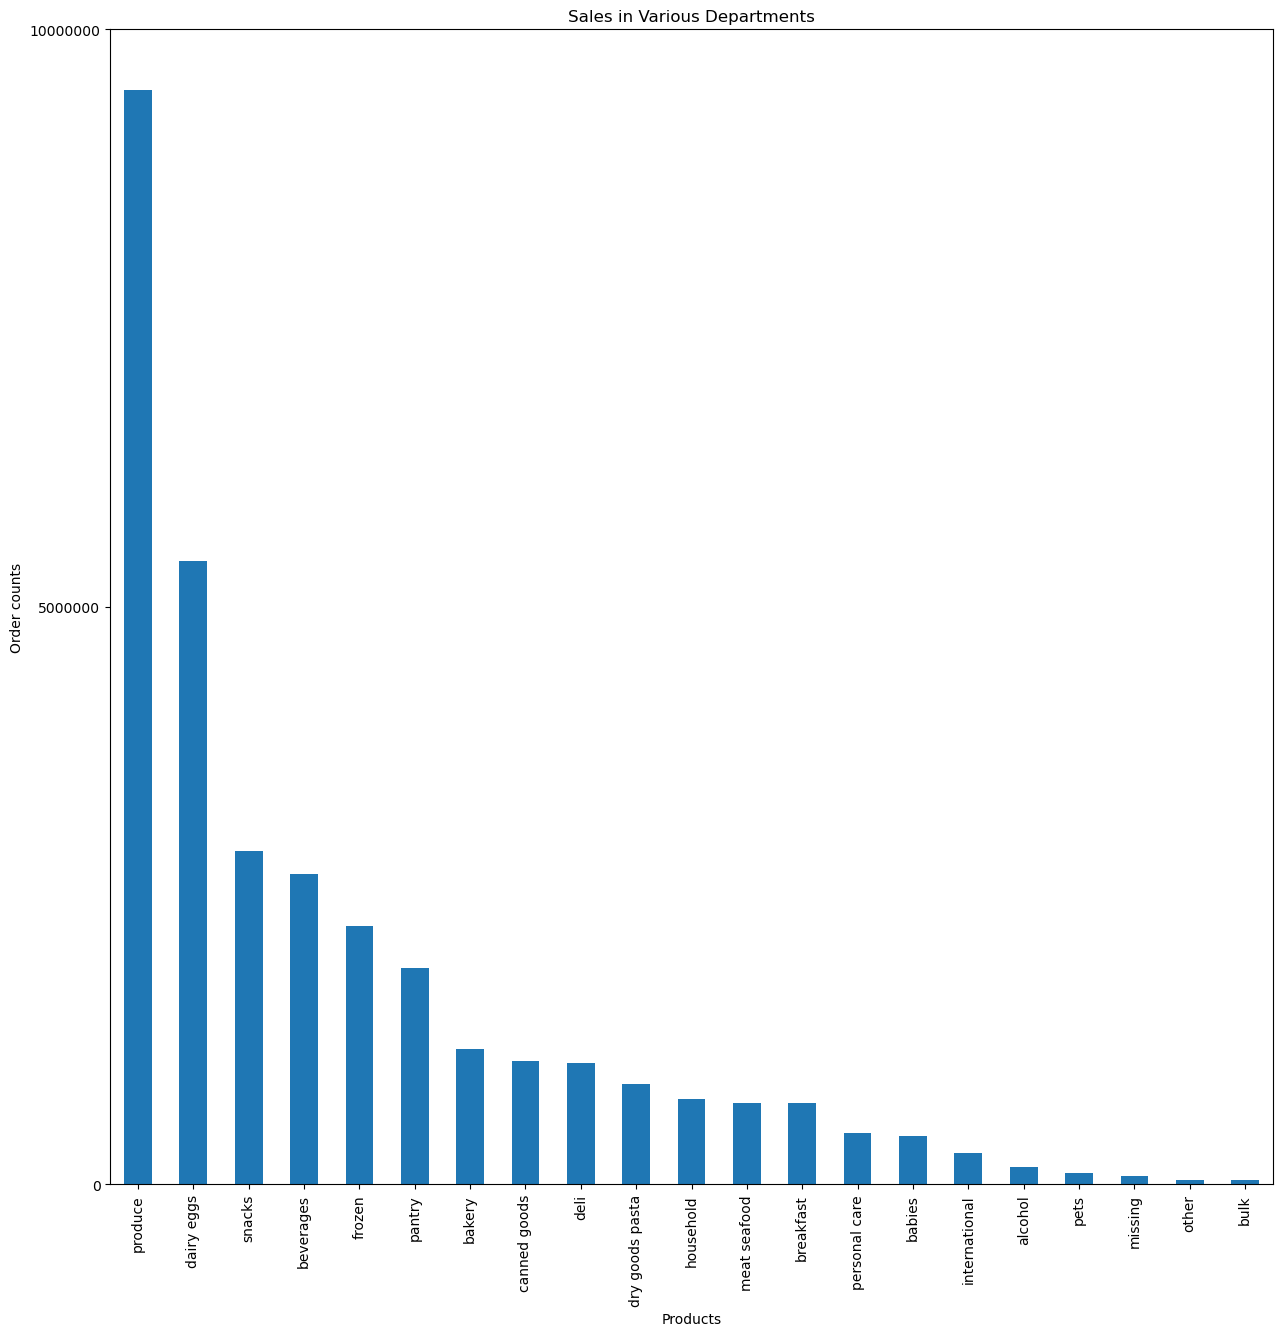

In [105]:
#Bar chart to show sales per department
plt.figure(figsize=(15, 15))

# Calculate the counts and sort by value (descending)
department_counts = customer_ords_prods['department_name'].value_counts().sort_values(ascending=False)

# Plot the bar chart with the sorted counts
department_counts.plot.bar()

# Add title and labels
plt.title('Sales in Various Departments')
plt.xlabel('Products')
plt.ylabel('Order counts')

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])

plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6 4.10 bar_sales_vs_departments.png'))
plt.show()

*In this bar chart, we can see that the produce section is the most popular deparment for total sales.*

## Part 11: Customer Profiles Between Parent Status and Income Brackets

In [111]:
# Define the desired order of income brackets
income_order = ['Low Income Customer', 'Middle Income Customer', 'High Income Customer']

# Convert 'Income_bracket' to a categorical type with the specified order
customer_ords_prods['income_bracket'] = pd.Categorical(customer_ords_prods['income_bracket'], categories=income_order, ordered=True)

crosstab_income_vs_dependents = pd.crosstab(customer_ords_prods['parent_status'], customer_ords_prods['income_bracket'], dropna = False)
crosstab_income_vs_dependents

income_bracket,Low Income Customer,Middle Income Customer,High Income Customer
parent_status,,,
Parent,12171617,6065107,6070632
Single,4027287,2035822,2034394


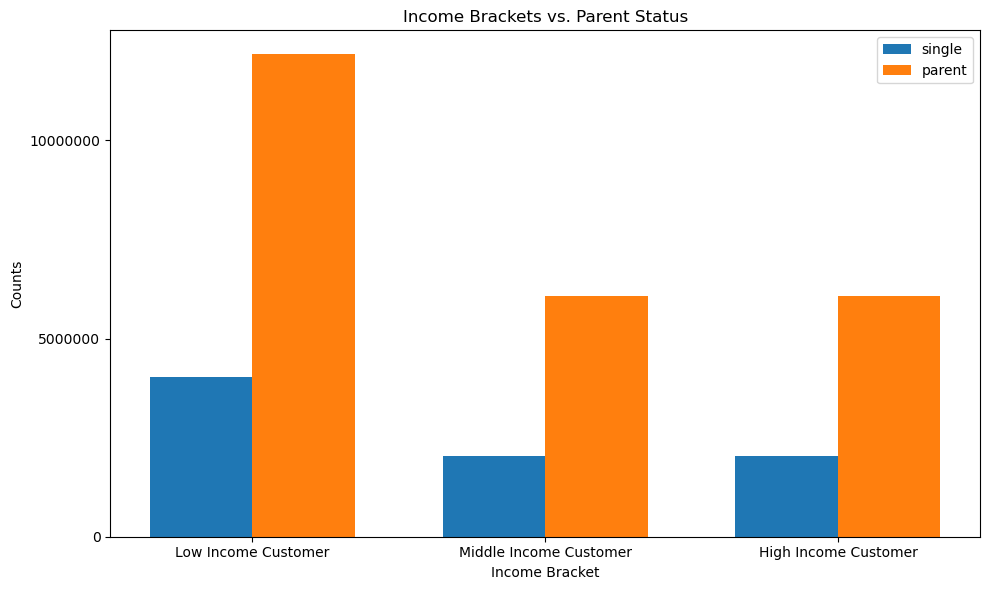

In [115]:
# Create index positions for the groups
n_categories = len(crosstab_income_vs_dependents.columns)  # number of income brackets (3 in this case)
bar_width = 0.35
r1 = np.arange(n_categories)
r2 = [x + bar_width for x in r1]  # shift r1 by bar_width to plot bars side by side

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot bars for 'single'
plt.bar(r1, crosstab_income_vs_dependents.loc['Single'], width=bar_width, label='single')

# Plot bars for 'parent'
plt.bar(r2, crosstab_income_vs_dependents.loc['Parent'], width=bar_width, label='parent')

# Add labels and title
plt.xlabel('Income Bracket')
plt.ylabel('Counts')
plt.title('Income Brackets vs. Parent Status')
plt.xticks([r + bar_width / 2 for r in range(len(crosstab_income_vs_dependents.columns))], crosstab_income_vs_dependents.columns)

# Add legend
plt.yticks(np.arange(0,15000000,5000000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,5000000)])
plt.legend()

plt.tight_layout() 
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 4.10 bar_incomes_vs_dependents.png'))
plt.show()

*This graph profiles Single and Parent patients across income brackets. The data indicates that most orders originated from parents within the lowest income quartile (below $96,608 annually, based on our customer data).*

## Part 12: Income Bracket Descriptive Statistics

In [127]:
#using a group by statement in order to aggregate data for the customer population
groupby_profile = customer_ords_prods.groupby('income_bracket', observed=False).agg({'prices': ['max', 'min', 'mean']})
groupby_profile

prices                
                            max  min       mean
income_bracket                                 
Low Income Customer     99999.0  1.0   8.023136
Middle Income Customer  99999.0  1.0   9.830749
High Income Customer    99999.0  1.0  22.037353

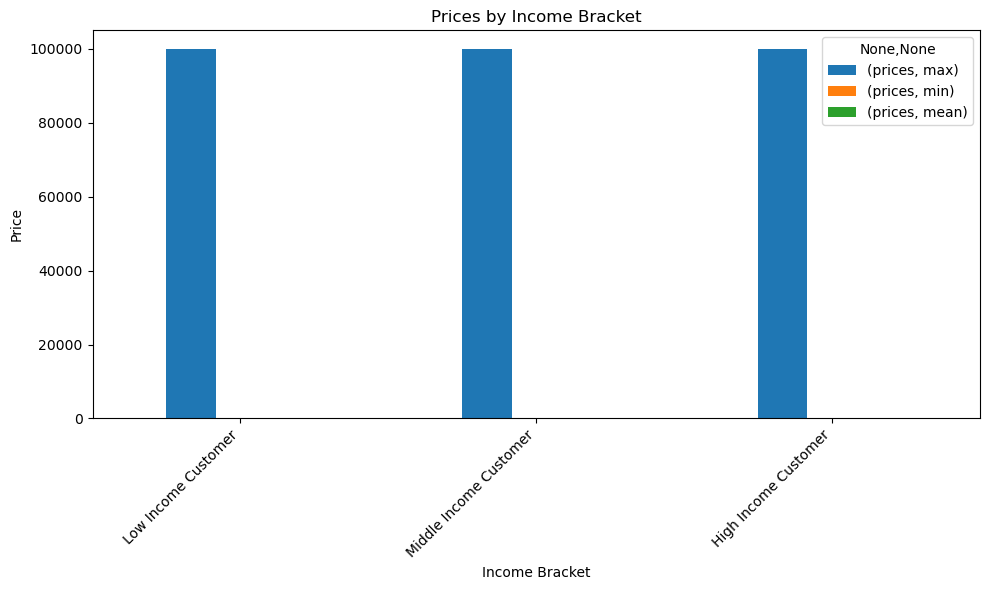

In [121]:
# Plot the bar graph
groupby_profile.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8 4.10 bar_income_vs_spending_habits.png'))
plt.show()

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [132]:
#A new subset of data filtered based on instacart's most popular demographic (Lower income parents)

low_income_parents = customer_ords_prods[(customer_ords_prods['parent_status'] == 'Parent') & (customer_ords_prods['income_bracket'] == 'Low Income Customer')]
low_income_parents.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,n_dependants,marital_status,income,region,activity_customer_level,age_group,income_bracket,parent_status,day_of_week,department_name
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,1,married,49620,Midwest,High-activity Customer,Senior,Low Income Customer,Parent,Friday,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,1,married,49620,Midwest,High-activity Customer,Senior,Low Income Customer,Parent,Friday,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,3,married,31308,Midwest,Low-activity Customer,Adult,Low Income Customer,Parent,Tuesday,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,3,married,31308,Midwest,Low-activity Customer,Adult,Low Income Customer,Parent,Wednesday,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,2,married,57797,West,High-activity Customer,Older adult,Low Income Customer,Parent,Sunday,snacks


In [134]:
#Product data used to identify which were the top 10 products that were purchased within this demographic
product_counts = low_income_parents['product_name'].value_counts(dropna=False)

top_10_products_low_income_parents=product_counts.head(10)
top_10_products_low_income_parents

#Through these value counts we can see that it is heaviy within the produce department, which is consistent with earlier graphs identified

product_name
Banana                    170591
Bag of Organic Bananas    143559
Organic Strawberries       97857
Organic Baby Spinach       88445
Organic Hass Avocado       78648
Organic Avocado            64548
Strawberries               58342
Large Lemon                53046
Organic Raspberries        51163
Limes                      49319
Name: count, dtype: int64

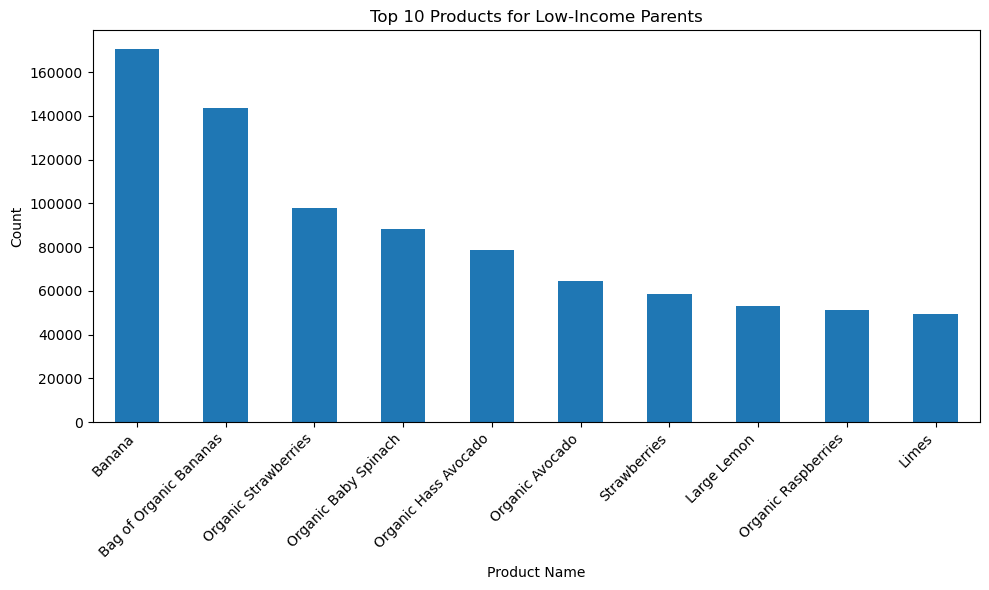

In [138]:
# Create a bar graph
plt.figure(figsize=(10, 6))
top_10_products_low_income_parents.plot(kind='bar')

# Add labels and title
plt.title('Top 10 Products for Low-Income Parents')
plt.xlabel('Product Name')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 4.10 bar_top_10_products_low_income_parents.png'))
plt.show()

*This graph highlights the products most frequently ordered by this population. Notably, all of them fall under the produce department. These findings can help our marketing team place greater emphasis on promoting these types of goods.*

# Part 13: Export Data

In [142]:
#Exporting final merged dataframe
customer_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_customer_ords_prods.pkl'))

OSError: [Errno 28] No space left on device

*I had a poblem exporting the final merged dataframe, I ran out space on my hard disk. Seems to be the generated file is incredible huge. I hope this issues doesn't represent a problem.*